# Import data

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import os

In [4]:
path = os.path.join('/home','manos','git','radiomics-features-extraction')
os.chdir(os.path.join(path, 'MaZda', 'data'))

dataset_info = pd.read_json(os.path.join(path, 'MaZda', 'data', 'files.json'))
dataset_info
# dataset = pd.read_excel(os.path.join(path, 'MaZda','data','lifex_extracted_features.xlsx'), skiprows=2)

,name,images,rois,report
0,R01-001,"[R01-124_slice_3.dcm, R01-120_slice_14.dcm, R0...","[R01-124_roi_slice_3.bmp, R01-120_roi_slice_14...","[result_R01-124_roi_slice_3.xls, result_R01-12..."
1,R01-002,"[R01-124_slice_3.dcm, R01-120_slice_14.dcm, R0...","[R01-124_roi_slice_3.bmp, R01-120_roi_slice_14...","[result_R01-124_roi_slice_3.xls, result_R01-12..."
2,R01-003,"[R01-124_slice_3.dcm, R01-120_slice_14.dcm, R0...","[R01-124_roi_slice_3.bmp, R01-120_roi_slice_14...","[result_R01-124_roi_slice_3.xls, result_R01-12..."
3,R01-004,"[R01-124_slice_3.dcm, R01-120_slice_14.dcm, R0...","[R01-124_roi_slice_3.bmp, R01-120_roi_slice_14...","[result_R01-124_roi_slice_3.xls, result_R01-12..."
4,R01-005,"[R01-124_slice_3.dcm, R01-120_slice_14.dcm, R0...","[R01-124_roi_slice_3.bmp, R01-120_roi_slice_14...","[result_R01-124_roi_slice_3.xls, result_R01-12..."
...,...,...,...,...
137,R01-141,"[R01-124_slice_3.dcm, R01-120_slice_14.dcm, R0...","[R01-124_roi_slice_3.bmp, R01-120_roi_slice_14...","[result_R01-124_roi_slice_3.xls, result_R01-12..."
138,R01-142,"[R01-124_slice_3.dcm, R01-120_slice_14.dcm, R0...","[R01-124_roi_slice_3.bmp, R01-120_roi_slice_14...","[result_R01-124_roi_slice_3.xls, result_R01-12..."
139,R01-144,"[R01-124_slice_3.dcm, R01-120_slice_14.dcm, R0...","[R01-124_roi_slice_3.bmp, R01-120_roi_slice_14...","[result_R01-124_roi_slice_3.xls, result_R01-12..."
140,R01-145,"[R01-124_slice_3.dcm, R01-120_slice_14.dcm, R0...","[R01-124_roi_slice_3.bmp, R01-120_roi_slice_14...","[result_R01-124_roi_slice_3.xls, result_R01-12..."


In [5]:
dataset_info.loc[:, ('name','images')]

,name,images
0,R01-001,"[R01-124_slice_3.dcm, R01-120_slice_14.dcm, R0..."
1,R01-002,"[R01-124_slice_3.dcm, R01-120_slice_14.dcm, R0..."
2,R01-003,"[R01-124_slice_3.dcm, R01-120_slice_14.dcm, R0..."
3,R01-004,"[R01-124_slice_3.dcm, R01-120_slice_14.dcm, R0..."
4,R01-005,"[R01-124_slice_3.dcm, R01-120_slice_14.dcm, R0..."
...,...,...
137,R01-141,"[R01-124_slice_3.dcm, R01-120_slice_14.dcm, R0..."
138,R01-142,"[R01-124_slice_3.dcm, R01-120_slice_14.dcm, R0..."
139,R01-144,"[R01-124_slice_3.dcm, R01-120_slice_14.dcm, R0..."
140,R01-145,"[R01-124_slice_3.dcm, R01-120_slice_14.dcm, R0..."


In [6]:
dataset = pd.read_table(os.path.join(path, 'MaZda','data','result_R01-001_roi_slice_0.xls'), skiprows=19)
dataset = dataset.drop(columns=['0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','0.10','0.11','0.12','0.13','0.14'])
dataset = dataset.T
dataset.reset_index(inplace=True)

In [7]:
new_header = dataset.iloc[0] #grab the first row for the header
dataset = dataset[1:] #take the data less the header row
dataset.columns = new_header #set the header row as the df header

dataset

,GeoX,GeoY,GeoF,GeoSpol,GeoSmax,GeoAox,GeoUg,GeoUw,GeoFmax,GeoFmin,...,WavEnHL_s-2,WavEnHH_s-2,WavEnLL_s-3,WavEnLH_s-3,WavEnHL_s-3,WavEnHH_s-3,WavEnLL_s-4,WavEnLH_s-4,WavEnHL_s-4,WavEnHH_s-4
1,124.76667,242.7,60,8.74039,12.53,-28.6105,78.8406,30.6785,12.5295,6.74643,...,24.3906,7.96094,410.521,7.63452,7.41714,4.06265,262.537,1.50497,4.65534,15.1108


In [8]:
# selected_features = pd.read_excel(os.path.join(path,'info','info.xlsx'), usecols='E')
# selected_features = selected_features.dropna().values.flatten()
# selected_features

In [9]:
selected_features = ['Mean',
 'Skewness',
 'Kurtosis',
 'S(1,0)AngScMom',
 'S(1,0)Contrast',
 'S(1,0)Correlat',
 'S(1,0)InvDfMom',
 'S(1,0)Entropy',
 'S(0,1)AngScMom',
 'S(0,1)Contrast',
 'S(0,1)Correlat',
 'S(0,1)InvDfMom',
 'S(0,1)Entropy',
 'S(1,1)AngScMom',
 'S(1,1)Contrast',
 'S(1,1)Correlat',
 'S(1,1)InvDfMom',
 'S(1,1)Entropy',
 'S(1,-1)AngScMom',
 'S(1,-1)Contrast',
 'S(1,-1)Correlat',
 'S(1,-1)InvDfMom',
 'S(1,-1)Entropy',
 'S(2,0)AngScMom',
 'S(2,0)Contrast',
 'S(2,0)Correlat',
 'S(2,0)InvDfMom',
 'S(2,0)Entropy',
 'S(0,2)AngScMom',
 'S(0,2)Contrast',
 'S(0,2)Correlat',
 'S(0,2)InvDfMom',
 'S(0,2)Entropy',
 'S(2,2)AngScMom',
 'S(2,2)Contrast',
 'S(2,2)Correlat',
 'S(2,2)InvDfMom',
 'S(2,2)Entropy',
 'S(2,-2)AngScMom',
 'S(2,-2)Contrast',
 'S(2,-2)Correlat',
 'S(2,-2)InvDfMom',
 'S(2,-2)Entropy',
 'S(3,0)AngScMom',
 'S(3,0)Contrast',
 'S(3,0)Correlat',
 'S(3,0)InvDfMom',
 'S(3,0)Entropy',
 'S(0,3)AngScMom',
 'S(0,3)Contrast',
 'S(0,3)Correlat',
 'S(0,3)InvDfMom',
 'S(0,3)Entropy',
 'S(3,3)AngScMom',
 'S(3,3)Contrast',
 'S(3,3)Correlat',
 'S(3,3)InvDfMom',
 'S(3,3)Entropy',
 'S(3,-3)AngScMom',
 'S(3,-3)Contrast',
 'S(3,-3)Correlat',
 'S(3,-3)InvDfMom',
 'S(3,-3)Entropy',
 'S(4,0)AngScMom',
 'S(4,0)Contrast',
 'S(4,0)Correlat',
 'S(4,0)InvDfMom',
 'S(4,0)Entropy',
 'S(0,4)AngScMom',
 'S(0,4)Contrast',
 'S(0,4)Correlat',
 'S(0,4)InvDfMom',
 'S(0,4)Entropy',
 'S(4,4)AngScMom',
 'S(4,4)Contrast',
 'S(4,4)Correlat',
 'S(4,4)InvDfMom',
 'S(4,4)Entropy',
 'S(4,-4)AngScMom',
 'S(4,-4)Contrast',
 'S(4,-4)Correlat',
 'S(4,-4)InvDfMom',
 'S(4,-4)Entropy',
 'S(5,0)AngScMom',
 'S(5,0)Contrast',
 'S(5,0)Correlat',
 'S(5,0)InvDfMom',
 'S(5,0)Entropy',
 'S(0,5)AngScMom',
 'S(0,5)Contrast',
 'S(0,5)Correlat',
 'S(0,5)InvDfMom',
 'S(0,5)Entropy',
 'S(5,5)AngScMom',
 'S(5,5)Contrast',
 'S(5,5)Correlat',
 'S(5,5)InvDfMom',
 'S(5,5)Entropy',
 'S(5,-5)AngScMom',
 'S(5,-5)Contrast',
 'S(5,-5)Correlat',
 'S(5,-5)InvDfMom',
 'S(5,-5)Entropy',
 'Horzl_RLNonUni',
 'Horzl_GLevNonU',
 'Horzl_LngREmph',
 'Horzl_ShrtREmp',
 'Vertl_RLNonUni',
 'Vertl_GLevNonU',
 'Vertl_LngREmph',
 'Vertl_ShrtREmp',
 '45dgr_RLNonUni',
 '45dgr_GLevNonU',
 '45dgr_LngREmph',
 '45dgr_ShrtREmp',
 '135dr_RLNonUni',
 '135dr_GLevNonU',
 '135dr_LngREmph',
 '135dr_ShrtREmp',
 'GrMean',
 'GrSkewness',
 'GrKurtosis']

# for index, feature_full_name in enumerate(dataset.columns):
# #     if selected_features[index] in feature_full_name:
# #         selected_features[].index = feature_full_name
#     for feature in selected_features:
#         if feature in feature_full_name:
# #             selected_features.remove(feature)
#             new_selected_features.append(feature_full_name)
# new_selected_features

In [12]:
selected_dataset = dataset[selected_features]
selected_dataset

,Mean,Skewness,Kurtosis,"S(1,0)AngScMom","S(1,0)Contrast","S(1,0)Correlat","S(1,0)InvDfMom","S(1,0)Entropy","S(0,1)AngScMom","S(0,1)Contrast",...,45dgr_GLevNonU,45dgr_LngREmph,45dgr_ShrtREmp,135dr_RLNonUni,135dr_GLevNonU,135dr_LngREmph,135dr_ShrtREmp,GrMean,GrSkewness,GrKurtosis
1,593.183,0.198479,-0.619327,0.022182,5.29787,0.609906,0.361962,1.71053,0.0236,4.12,...,5.41509,1.39623,0.900943,45.9091,5.83636,1.27273,0.931818,1.15667,-0.545777,-0.0269947


In [184]:
selected_dataset.describe()

,Mean,Skewness,Kurtosis,"S(1,0)AngScMom","S(1,0)Contrast","S(1,0)Correlat","S(1,0)InvDfMom","S(1,0)Entropy","S(0,1)AngScMom","S(0,1)Contrast",...,45dgr_GLevNonU,45dgr_LngREmph,45dgr_ShrtREmp,135dr_RLNonUni,135dr_GLevNonU,135dr_LngREmph,135dr_ShrtREmp,GrMean,GrSkewness,GrKurtosis
count,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
unique,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
top,593.18333,0.198479,-0.619327,0.022182,5.297872,0.609906,0.361962,1.710527,0.0236,4.12,...,5.415094,1.396226,0.900943,45.909091,5.836364,1.272727,0.931818,1.156675,-0.545777,-0.026995
freq,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Plot features as a heatmap

A heat map gives the correlation of features to each other, red indicating positive correlation, and blue negative.  A heatmap may be clustered to show groupings of features that are similar.

ValueError: zero-size array to reduction operation fmin which has no identity

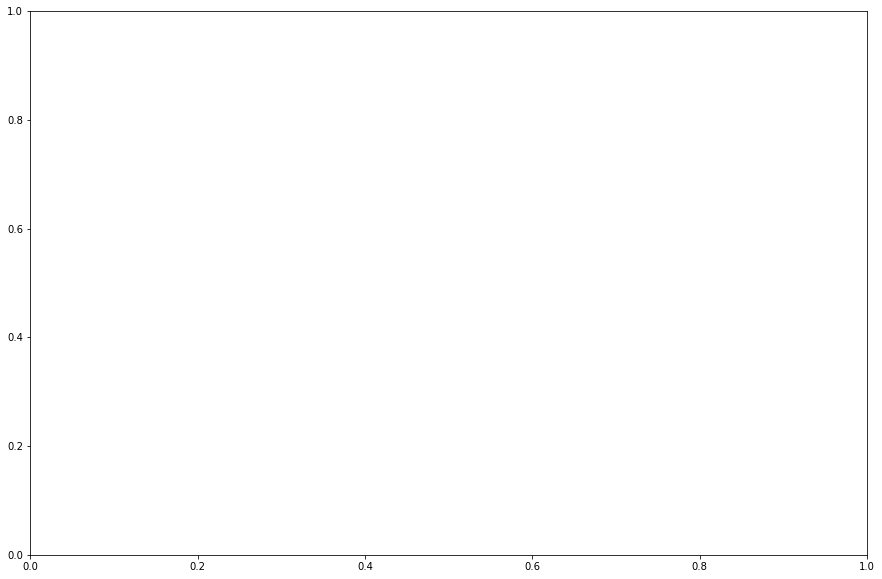

In [185]:
import seaborn as sns

corr = selected_dataset.corr()

# Set up the matplotlib figure, make it big!
f, ax = plt.subplots(figsize=(15, 10))

# Draw the heatmap using seaborn
sns.heatmap(corr, vmax=.8, square=True)

# Cluster the heatmap

Though useful, heatmaps tell a much better story if the features are clustered.  Here we take a smaller subset of the features and cluster.  In the [dendrogram](https://en.wikipedia.org/wiki/Dendrogram), there are 2 major groups, and many smaller groupings based on features. 

/home/manos/anaconda3/envs/radiomics/lib/python3.7/site-packages/seaborn/matrix.py:620: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


ValueError: The number of observations cannot be determined on an empty distance matrix.

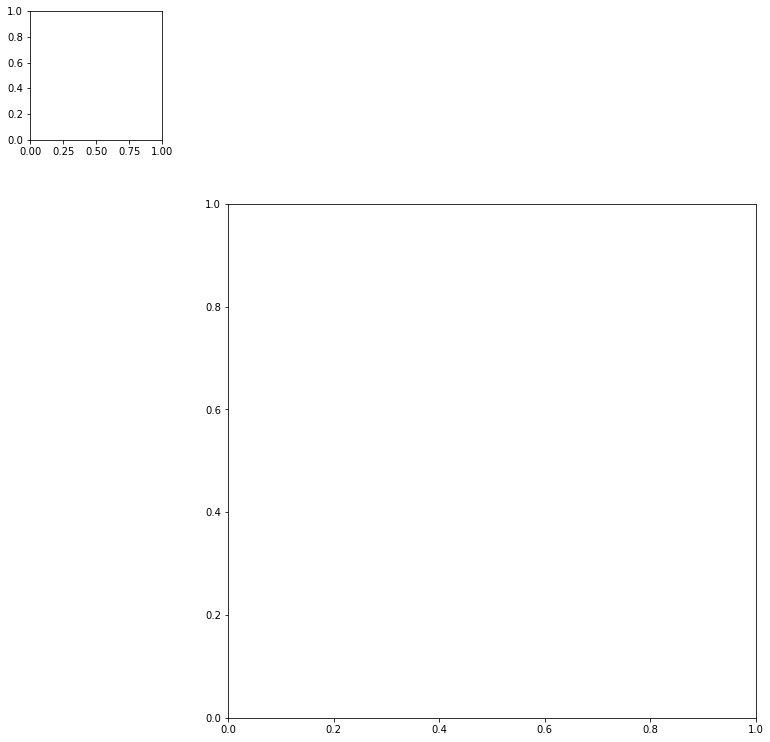

In [186]:
# Choose a subset of features for clustering
dd = selected_dataset.iloc[:,1:50]

pp = sns.clustermap(dd.corr(), linewidths=.5, figsize=(13,13))
_ = plt.setp(pp.ax_heatmap.get_yticklabels(), rotation=0)

plt.show()

# Distributions

In [187]:
ax = selected_dataset.hist(alpha=0.5, figsize=(20,15))

ValueError: hist method requires numerical columns, nothing to plot.

In [187]:
# ax = selected_dataset.plot.kde()